# Titanic 데이터 분석 및 생존 예측
- 데이터 EDA
- Feature engineering
- 머신러닝 모델 학습 및 평가

## 1. 데이터 EDA

우선 데이터를 불러오기 위해 pandas를 import한다

In [1]:
import pandas as pd

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

# 가공할 데이터 이외에 복사본을 생성
train_copy = train.copy()
test_copy = test.copy() 

In [2]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 설명
- PassengerId: 각 승객의 고유번호(의미가 크게 없으므로 제거한다)
- Survived: 생존 여부	0 = No, 1 = Yes  
- pclass: 	티켓의 승선권 클래스	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	동반한 형제자매와 배우자의 수를 의미
- parch:	동반한 부모와 자식의 수
- ticket:	티켓의 고유 number	
- cabin:	객실 번호(객실 번호로 위치가 정해질 수 있다.)	
- embarked:	승선항(어디에서 탔는가?)	C = Cherbourg, Q = Queenstown, S = Southampton  
- Fare : 티켓 요금
- Age : 나이
- Sex : 성별
- Name : 이름

### 우선 PassengerId는 먼저 제거하도록한다.

In [3]:
del train['PassengerId']

In [4]:
del test['PassengerId']

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Train과 Test 데이터의 개수 및 구조 파악하기

In [7]:
train.shape

(891, 11)

In [8]:
test.shape

(418, 10)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.7+ KB


### *Age*, *Cabin*, *Embarked* 특성의 경우 null 값 즉 빈칸이 존재한다.
isnull로 그 수를 확인할 수 있다.

In [11]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
train.isnull().sum() / len(train) 

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [13]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [14]:
test.isnull().sum() / len(test) 

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64

### Embarked의 경우 missing된 값이 적어 크게 문제가 되지 않는다. 
### Cabin의 경우 너무 missing된 값이 70%이상이기 때문에 없애는 것이 좋을 것이다.
### Age같은 경우 비교적 비율이 적기 때문에 예측하여 채워주는 것이 좋을듯
### Fare같은 경우도 채우는 것이 바람직하다.

따라서 Cabin의 경우 삭제하도록 한다.

In [15]:
del train['Cabin']

In [16]:
del test['Cabin']

In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
# train 데이터의 숫자형이 아닌 것들(문자형)의 object 자체 정보를 요약
# include =['O'](알파벳)을 사용
train.describe(include=["O"])

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Hedman, Mr. Oskar Arvid",male,CA. 2343,S
freq,1,577,7,644


### 위의 결과, unique를 참고하면 Ticket의 경우 891개 중에 681개나 고유값이 존재하여 크게 고려해야할 대상이 아닌듯 하다

### Name의 경우 호칭에 따라 가족 여부, 성별을 알 수 있으므로 보류하는 것이 좋다.

In [20]:
del train['Ticket']
del test['Ticket']

train 데이터의 생존 여부

In [21]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### train데이터의 숫자 특성 요약정보

In [22]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### test데이터의 숫자 특성 요약정보

In [23]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


### visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set() # setting seaborn default for plots

### 숫자형에 대한 분포를 히스토그램을 통해 전체적으로 살펴본다

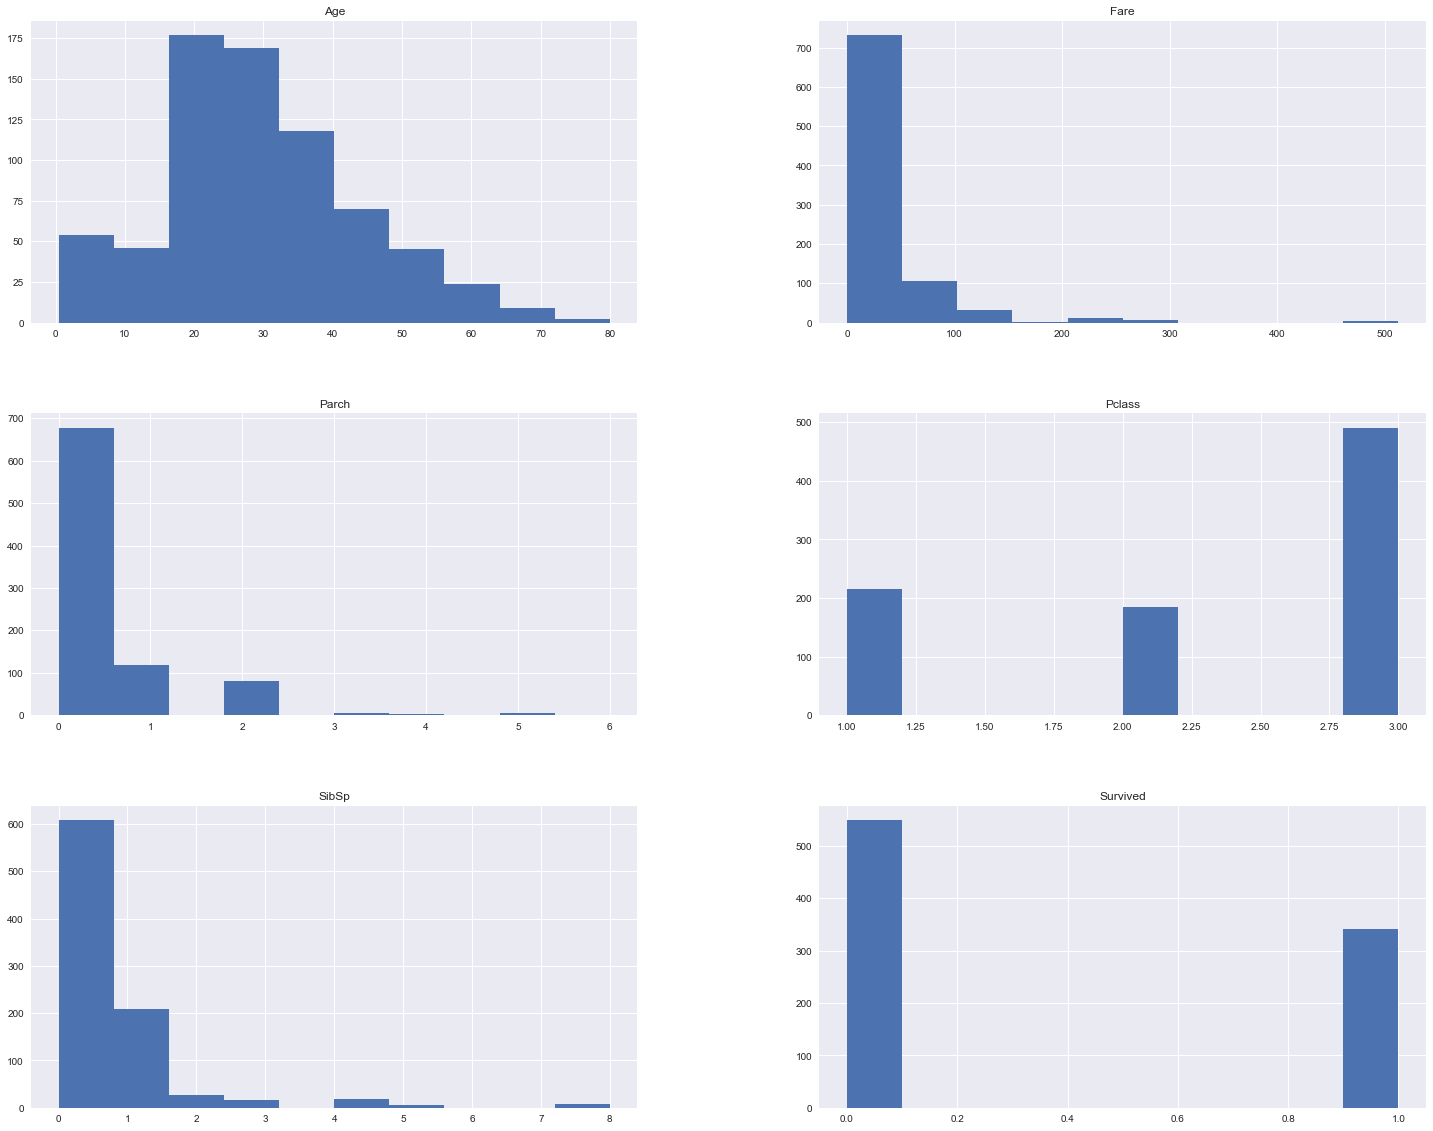

In [25]:
train.hist(bins = 10,figsize = (25,20)) # bins는 구간의 경계값 리스트를 의미
plt.show()

### 생존 여부에 따른 차트분석(숫자형에 대해)
- Pclass
- Sex
- SibSp (동반한 형제자매와 배우자 수)
- Parch (동반한 부모와 자식의 수)

In [26]:
import numpy as np

In [27]:
train.groupby('Sex')['Survived'].sum()/train['Sex'].value_counts()

female    0.742038
male      0.188908
dtype: float64

In [28]:
# 각 특성에 따른 survive 여부
def crosstab_by_survive(data_frame,target):
    cross = pd.crosstab(data_frame[target], data_frame['Survived'])
    cross.plot(kind='bar')
    plt.show()
    
    print('===',target,'===')
    print(cross)
    
    print()
    print('Survived(%)')
    print(data_frame.groupby(target)['Survived'].sum()/train[target].value_counts()*100)
    print()
    
    #print(data_frame.groupby([target]).size()/len(data_frame)*100)
 
# survive에 따른 특성 비율 여부
def bar_by_survive(data_frame,target):
    survived = data_frame[data_frame['Survived']==1][target].value_counts()
    dead = data_frame[data_frame['Survived']==0][target].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
    plt.show()
    print('===',target,'===')
    print('Survived(%)')
    print(survived/np.sum(survived)*100)
    
    print()
    print('Dead(%)')
    print(dead/np.sum(dead)*100)
    print()

### crosstab_by_survive : 각 속성에 따른 생존 여부 ex) 성별 '여' 중에서 Survived, '남' 중에서 Survived 비율

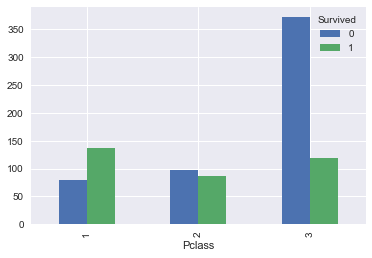

=== Pclass ===
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survived(%)
1    62.962963
2    47.282609
3    24.236253
dtype: float64



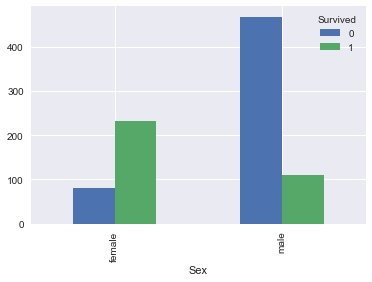

=== Sex ===
Survived    0    1
Sex               
female     81  233
male      468  109

Survived(%)
female    74.203822
male      18.890815
dtype: float64



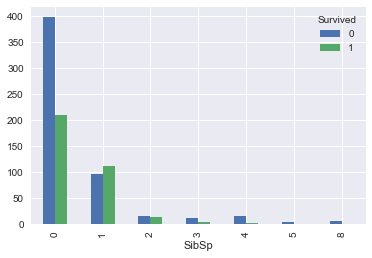

=== SibSp ===
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0

Survived(%)
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
dtype: float64



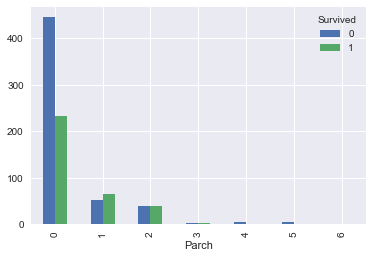

=== Parch ===
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0

Survived(%)
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
dtype: float64



In [29]:
list_by_survived = ['Pclass', 'Sex', 'SibSp', 'Parch']
for i in range(len(list_by_survived)):
    crosstab_by_survive(train,list_by_survived[i])

 cross tab 그래프 결과
 - Pclass : 클래스가 높을 수록 비교적 생존확률이 높다. 1등 클래스는 63% 정도가 생존한 반면 3등 클래스는 24% 정도 밖에 되지 않았다.
 - Sex : 남상보다는 여성의 생존 확률이 높았다.(영화 <타이타닉>에서 '여자와 아이부터'처럼 그 영향이 어느정도 있는 듯하다 )
 - SibSp : 동반한 형제자매 및 배우자 수가 없는 경우 1명 혹은 2명의 가족이 있는 경우가 다른 경우보다 더 높은 생존확률을 보인다.
 - Parch : 동반한 부모와 자식의 수가 1명 이상일 경우 대체적으로 생존 확률이 높은 것을 확인할 수 있다

### bar_by_survive : 생존 여부에 따른 특성 비율 ex) 살아남은 사람 중에 성(남,여)비율

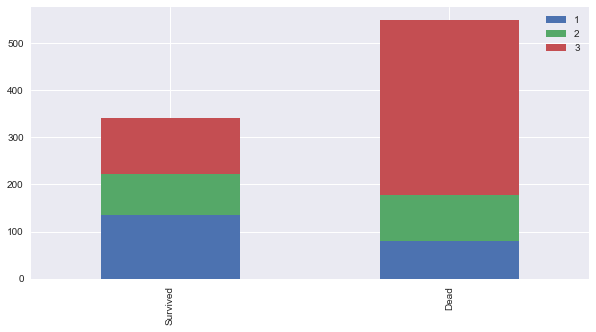

=== Pclass ===
Survived(%)
1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64

Dead(%)
3    67.759563
2    17.668488
1    14.571949
Name: Pclass, dtype: float64



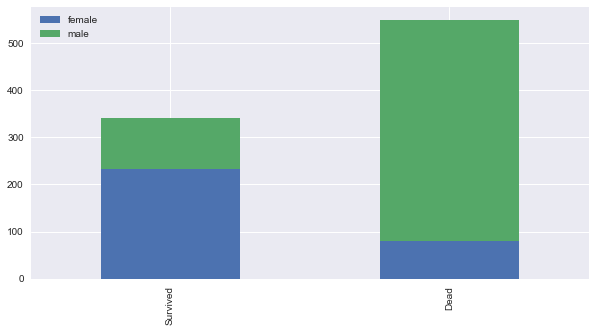

=== Sex ===
Survived(%)
female    68.128655
male      31.871345
Name: Sex, dtype: float64

Dead(%)
male      85.245902
female    14.754098
Name: Sex, dtype: float64



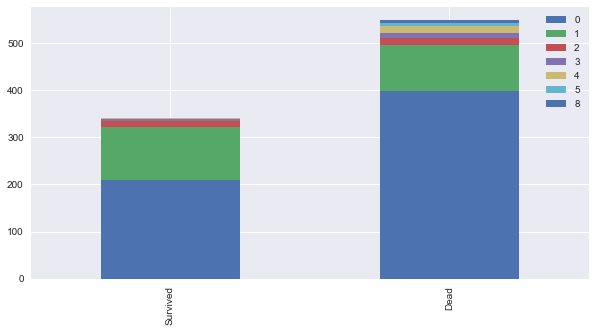

=== SibSp ===
Survived(%)
0    61.403509
1    32.748538
2     3.801170
3     1.169591
4     0.877193
Name: SibSp, dtype: float64

Dead(%)
0    72.495446
1    17.668488
4     2.732240
2     2.732240
3     2.185792
8     1.275046
5     0.910747
Name: SibSp, dtype: float64



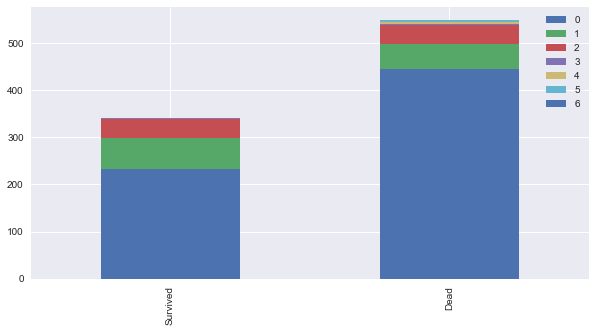

=== Parch ===
Survived(%)
0    68.128655
1    19.005848
2    11.695906
3     0.877193
5     0.292398
Name: Parch, dtype: float64

Dead(%)
0    81.056466
1     9.653916
2     7.285974
5     0.728597
4     0.728597
3     0.364299
6     0.182149
Name: Parch, dtype: float64



In [30]:
list_bar_by_survived = ['Pclass', 'Sex', 'SibSp', 'Parch']
for i in range(len(list_by_survived)):
    bar_by_survive(train,list_by_survived[i])

 bar그래프 결과
 - Pclass : 생존한 사람들 중에서는 1등급 클래스가 가장 많이 살아남았으며, 3등급 클래스 사람들이 많은 비율로 사망하였다.
 - Sex : 살아남은 사람의 비율은 남녀비율 3:7로 여성이 많이 살아남았으며, 사망자의 85%정도가 남자이다.
 - SibSp : 형제자매나 배우자가 없는 경우 살아남은 혹은 사망한 사람들 비율이 가장 높았으며, 이는 단신으로 온 사람이 많다는 것 의미
 - Parch : SibSp과 마찬가지로 0이 앞도적으로 수가 많아 Survived, Dead비율이 높다.

요약(Numeric data)
1. 높은 등급의 클래스의 사람이 살 확률이 높다.
2. 남성보다 여성의 생존 확률이 높다.
3. 가족이나 친인척과 동승한 경우 생존 확률이 높다.
4. 대다수가 가족이나 친인척과 오지 않았다.

# Feature Engineering

위에서 언급했던 특성인 Name, Age, Fare에 대하여 빈 칸을 채우고 머신러닝 모델을 위해 수정한다.
- Name : Mr, Mrs와 같이 성별과 결혼 유무 등을 나타내는 호칭을 뽑아낸다.
- Age : 빈칸을 호칭에 따라 평균 혹은 중간 값으로 매우고 범위에 따라 숫자로 변환한다.
- Fare :빈칸을 채움

### Name

In [31]:
total_data = [train, test]

# 호칭 분리하기
for dataset in total_data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]*)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Don           1
Countess      1
Jonkheer      1
Capt          1
Ms            1
Sir           1
Lady          1
Name: Title, dtype: int64

참고<br>
Mr : 성인 남자<br>
Ms : 성인 여자<br>
Mrs : 기혼 여성<br>
Miss : 12세 미만 여자 아이<br>
Master : 12세 미만 남자 아이<br>

위의 결과로 크게 4가지 Mr, Miss, Mrs, Master와 나머지로 나눌 수 있다. 따라서 다음과 같이 mapping해준다.<br>

Mr : 0<br>
Miss : 1<br>
Mrs : 2<br>
Master :3<br>
others : 4<br>
    
또한 비교적 성별이 생존여부와 크게 연관성을 지니므로 countess, Lady, Mlle, Mme, Ms는 모두 Mrs에 포함 시키도록하자.

In [33]:
other_list = ['Dr', 'Rev','Col','Major','Capt','Don','Sir','Jonkheer']

for dataset in total_data:
    dataset['Title'] = dataset['Title'].replace('Countess','Mrs')
    dataset['Title'] = dataset['Title'].replace('Lady','Mrs')
    dataset['Title'] = dataset['Title'].replace('Mlle','Mrs')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms','Mrs')
    dataset['Title'] = dataset['Title'].replace(other_list,'other')
    

In [34]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       131
Master     40
other      21
Name: Title, dtype: int64

map을 사용하여 호칭을 숫자로 매핑함

In [35]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "other": 4}
for dataset in total_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [36]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [37]:
test['Title'].isnull().sum()

1

In [38]:
np.where(test['Title'].isnull()==1)

(array([414], dtype=int64),)

In [39]:
test.loc[414]

Pclass                                 1
Name        Oliva y Ocana, Dona. Fermina
Sex                               female
Age                                   39
SibSp                                  0
Parch                                  0
Fare                               108.9
Embarked                               C
Title                                NaN
Name: 414, dtype: object

위의 TItle은 39세 여성, 같이 동반한 사람이 없으므로 Ms이다. Train 데이터에서 Ms는 Mrs로 replace하였으므로 Mrs로 입력한다.

In [40]:
test['Title'] = test['Title'].fillna(2)

In [41]:
test['Title'].isnull().sum()

0

Name에서 호칭을 따로 구분하였스며, Name자체는 의미가 없으므로 지우도록 한다.

In [42]:
del train['Name']
del test['Name']

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0


Mr : 0
Miss : 1
Mrs : 2
Master :3
others : 4

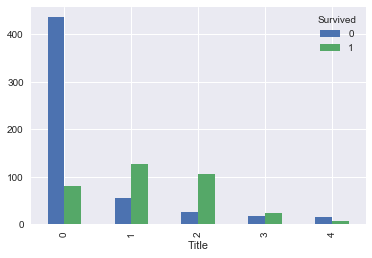

=== Title ===
Survived    0    1
Title             
0         436   81
1          55  127
2          26  105
3          17   23
4          15    6

Survived(%)
Title
0    15.667311
1    69.780220
2    80.152672
3    57.500000
4    28.571429
dtype: float64



In [44]:
crosstab_by_survive(train,'Title')

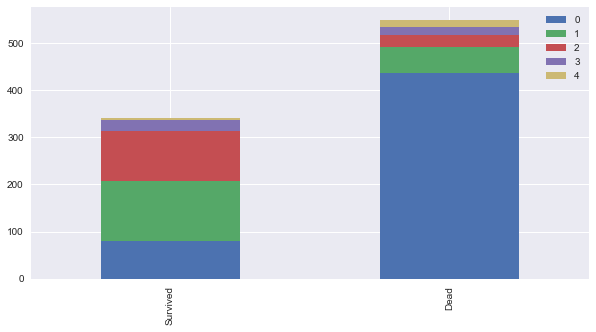

=== Title ===
Survived(%)
1    37.134503
2    30.701754
0    23.684211
3     6.725146
4     1.754386
Name: Title, dtype: float64

Dead(%)
0    79.417122
1    10.018215
2     4.735883
3     3.096539
4     2.732240
Name: Title, dtype: float64



In [45]:
bar_by_survive(train,'Title')

### 위의 그래프 결과로 여자아이 'Miss(1)'가 가장 생존 확률이 높았으며 다음으로는 기혼여성 'Mrs(2)'이 높았다.

### Age

Missing age는 다음을 참고하여 값을 채울 수 있다.<br>

Mr : 성인 남자
Ms : 성인 여자
Mrs : 기혼 여성
Miss : 12세 미만 여자 아이
Master : 12세 미만 남자 아이



In [46]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,0


In [48]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,0.0
1,3,female,47.0,1,0,7.0000,S,2.0
2,2,male,62.0,0,0,9.6875,Q,0.0
3,3,male,27.0,0,0,8.6625,S,0.0
4,3,female,22.0,1,1,12.2875,S,2.0


Age 분포

C:\Anaconda3\envs\tensorflow35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


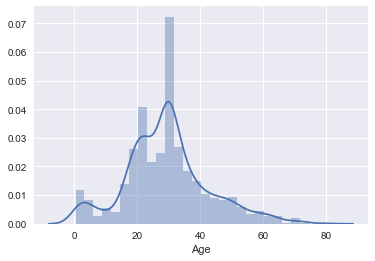

In [49]:
sns.distplot(train['Age'])

### 생존 여부에 따른 Age분포

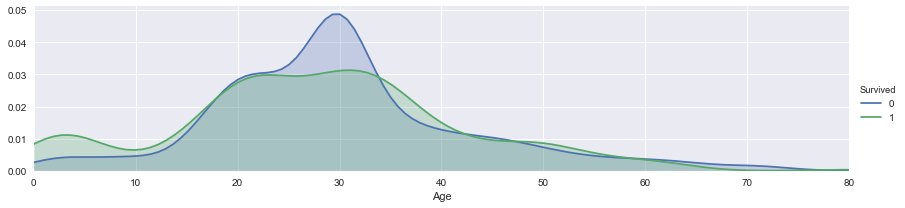

In [50]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

### 성별에 따른 생존여부

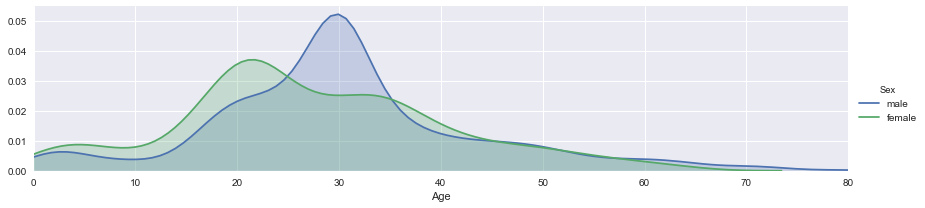

In [51]:
facet = sns.FacetGrid(train, hue="Sex",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

Mr : 0 Miss : 1 Mrs : 2 Master :3 others : 4

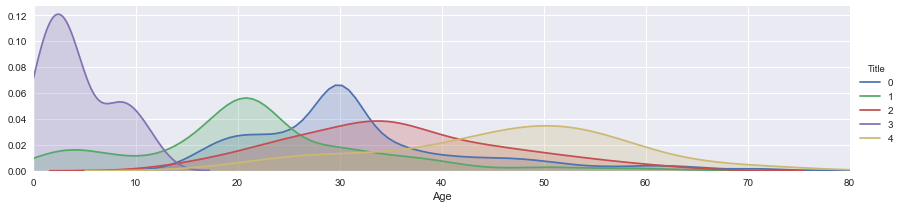

In [52]:
facet = sns.FacetGrid(train, hue="Title",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

### Age의 경우 값이 연속적이므로 정보력이 오히려 떨어질 수 있으므로 카테고리화 한다.<br>
### 여기서 카테고리 할 때의 기준은 위의 분포에 따른다. 특히 성별이 여성 또는 Miss, Mrs의 생존 확률이 높으므로 그것을 고려하여 나눈다.<br>

0 : 14이하<br>
1 : 15이상 24세 이하<br>
2 : 25이상 34세 이하<br>
3 : 35이상 44세 이하<br>
4 : 45이상 50세 이하<br>
5 : 51이상<br>

In [53]:
for dataset in total_data:
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 24), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 34), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 34) & (dataset['Age'] <= 44), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 50), 'Age'] = 4,
    dataset.loc[ dataset['Age'] > 50, 'Age'] = 5

In [54]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1.0,1,0,7.2500,S,0
1,1,1,female,3.0,1,0,71.2833,C,2
2,1,3,female,2.0,0,0,7.9250,S,1
3,1,1,female,3.0,1,0,53.1000,S,2
4,0,3,male,3.0,0,0,8.0500,S,0


In [55]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,3.0,0,0,7.8292,Q,0.0
1,3,female,4.0,1,0,7.0000,S,2.0
2,2,male,5.0,0,0,9.6875,Q,0.0
3,3,male,2.0,0,0,8.6625,S,0.0
4,3,female,1.0,1,1,12.2875,S,2.0


### Sex
male : 0
female : 1

In [56]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)

train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)

In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,0
1,1,1,1,3.0,1,0,71.2833,C,2
2,1,3,1,2.0,0,0,7.9250,S,1
3,1,1,1,3.0,1,0,53.1000,S,2
4,0,3,0,3.0,0,0,8.0500,S,0


In [58]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,3.0,0,0,7.8292,Q,0.0
1,3,1,4.0,1,0,7.0000,S,2.0
2,2,0,5.0,0,0,9.6875,Q,0.0
3,3,0,2.0,0,0,8.6625,S,0.0
4,3,1,1.0,1,1,12.2875,S,2.0


### Embarked

In [59]:
np.where(train['Embarked'].isnull())

(array([ 61, 829], dtype=int64),)

In [60]:
np.where(test['Embarked'].isnull())

(array([], dtype=int64),)

In [61]:
train.loc[[61,829]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
61,1,1,1,3.0,0,0,80.0,NaN,1
829,1,1,1,5.0,0,0,80.0,NaN,2


Embarked가 NaN인 경우, 위와 같은 정보가 나왔다.<br>
위의 조건(어린아이, 여자, Pclass(1))을 고려하여 채워준다.<br>

61번째 경우

In [62]:
train[(train['Pclass']==1)&(train['Sex']==1)&(train['Age']==3)&(train['Title']==1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
61,1,1,1,3.0,0,0,80.0000,NaN,1
258,1,1,1,3.0,0,0,512.3292,C,1
269,1,1,1,3.0,0,0,135.6333,S,1
325,1,1,1,3.0,0,0,135.6333,C,1
337,1,1,1,3.0,0,0,134.5000,C,1
380,1,1,1,3.0,0,0,227.5250,C,1
540,1,1,1,3.0,0,2,71.0000,S,1
609,1,1,1,3.0,0,0,153.4625,S,1
716,1,1,1,3.0,0,0,227.5250,C,1
835,1,1,1,3.0,1,1,83.1583,C,1


In [63]:
train[(train['Pclass']==1)&(train['Sex']==1)&(train['Age']==3)&(train['Title']==1)]['Embarked'].value_counts()

C    6
S    3
Name: Embarked, dtype: int64

위의 결과 61번째의 경우 C가 더 많은 것을 볼 수 있다.

829의 경우

In [64]:
train[(train['Pclass']==1)&(train['Sex']==1)&(train['Age']==5)&(train['Title']==2)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
268,1,1,1,5.0,0,1,153.4625,S,2
366,1,1,1,5.0,1,0,75.2500,C,2
513,1,1,1,5.0,1,0,59.4000,C,2
571,1,1,1,5.0,2,0,51.4792,S,2
591,1,1,1,5.0,1,0,78.2667,C,2
765,1,1,1,5.0,1,0,77.9583,S,2
820,1,1,1,5.0,1,1,93.5000,S,2
829,1,1,1,5.0,0,0,80.0000,NaN,2
879,1,1,1,5.0,0,1,83.1583,C,2


In [65]:
train[(train['Pclass']==1)&(train['Sex']==1)&(train['Age']==5)&(train['Title']==2)]['Embarked'].value_counts()

S    4
C    4
Name: Embarked, dtype: int64

829번째의 경우 반반이다. Fare를 고려하여 80정도의 가격에는 C가 더 많으므로 C로 채우겠다.

In [66]:
train['Embarked'] = train['Embarked'].fillna('C')

In [67]:
np.sum(train['Embarked'].isnull())

0

채운 Embarked문자를 머신러닝 학습을 위해 숫자로 mapping시킨다.

In [68]:
embarked_mapping_list = {"S": 0, "C": 1, "Q": 2}
for dataset in total_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping_list)

In [69]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,3.0,1,0,71.2833,1,2
2,1,3,1,2.0,0,0,7.9250,0,1
3,1,1,1,3.0,1,0,53.1000,0,2
4,0,3,0,3.0,0,0,8.0500,0,0


In [70]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,3.0,0,0,7.8292,2,0.0
1,3,1,4.0,1,0,7.0000,0,2.0
2,2,0,5.0,0,0,9.6875,2,0.0
3,3,0,2.0,0,0,8.6625,0,0.0
4,3,1,1.0,1,1,12.2875,0,2.0


### Fare

In [71]:
np.sum(train['Fare'].isnull())

0

test의 경우 Fare가 null이 존재하므로 채워주도록 한다.
### 주의할 점은 test 데이터이기 때문에 train데이터의 특성을 보고 test 데이터를 채워야한다

In [72]:
np.sum(test['Fare'].isnull())

1

In [73]:
np.where(test['Fare'].isnull())

(array([152], dtype=int64),)

In [74]:
test.loc[[152]]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,3,0,5.0,0,0,NaN,0,0.0


같은 조건의 경우를 찾아서 가장 많이 분포하는 값으로 채워주도록한다.

In [75]:
train[(train['Pclass']==3)&(train['Sex']==0)&(train['Age']==5)&(train['Title']==0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
94,0,3,0,5.0,0,0,7.2500,0,0
116,0,3,0,5.0,0,0,7.7500,2,0
152,0,3,0,5.0,0,0,8.0500,0,0
222,0,3,0,5.0,0,0,8.0500,0,0
280,0,3,0,5.0,0,0,7.7500,2,0
326,0,3,0,5.0,0,0,6.2375,0,0
406,0,3,0,5.0,0,0,7.7500,0,0
631,0,3,0,5.0,0,0,7.0542,0,0
851,0,3,0,5.0,0,0,7.7750,0,0


In [76]:
train[(train['Pclass']==3)&(train['Sex']==0)&(train['Age']==5)&(train['Title']==0)]['Fare'].median()

7.75

같은 정보를 가진 Fare 중간값을 채워주도록한다.

In [77]:
test['Fare'] = test['Fare'].fillna(7.75)

In [78]:
np.sum(test['Fare'].isnull())

0

Fare의 경우는 normalization해주도록 한다.

In [79]:
def norm(data_frame, target):
    data_frame[target] = (data_frame[target] - data_frame[target].min()) / (data_frame[target].max() - data_frame[target].min())

In [80]:
# norm(train, 'Fare')

In [81]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,0
1,1,1,1,3.0,1,0,71.2833,1,2
2,1,3,1,2.0,0,0,7.9250,0,1
3,1,1,1,3.0,1,0,53.1000,0,2
4,0,3,0,3.0,0,0,8.0500,0,0


### 마지막으로 특성끼리의 관계를 살펴보도록 한다.

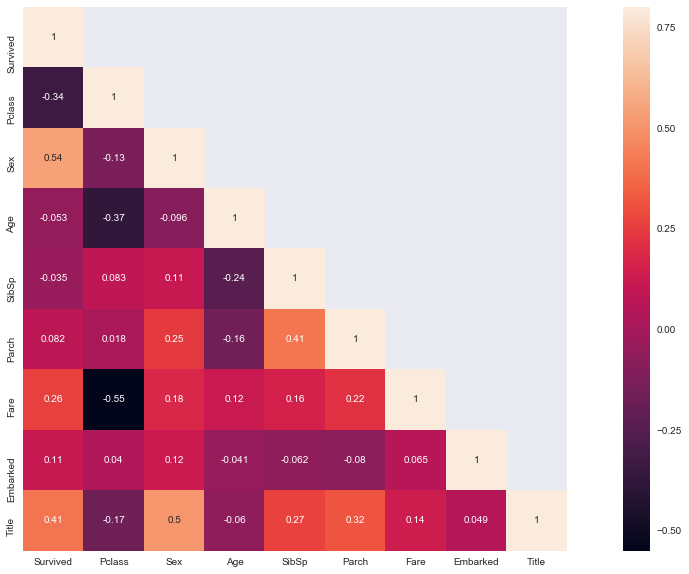

In [82]:
corr_mat = train.corr()

mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

#### 생각보다 Fare와 Pclass의 관계가 마이너스인 거을 볼 수 있는데 아마 나이가 낮을수록 요금을 더 받을 것이라 가정할 수 있다

나이와 Pclass에 따른 가격

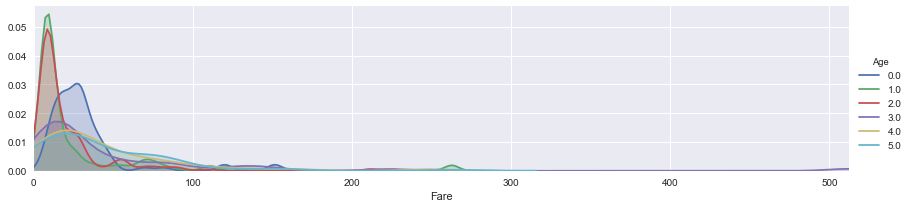

In [83]:
facet = sns.FacetGrid(train, hue="Age",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

In [84]:
train[train['Age']==0].groupby(['Pclass'])['Fare'].median()

Pclass
1    120.000
2     26.250
3     22.025
Name: Fare, dtype: float64

In [85]:
age_dict = {'0' : '14이하','1' : '15이상 24세 이하' , '2' : '25이상 34세 이하',  '3' : '35이상 44세 이하'
, '4' : '45이상 50세 이하', '5' : '51이상'}

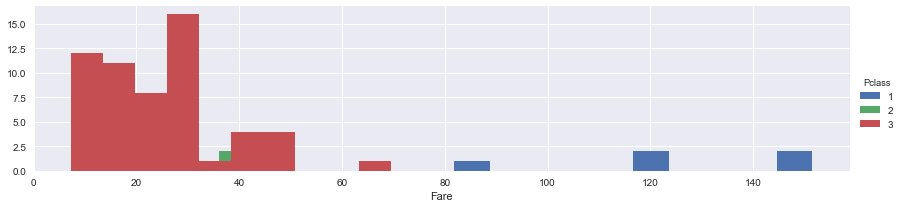

14이하
Pclass
1    120.000
2     26.250
3     22.025
Name: Fare, dtype: float64


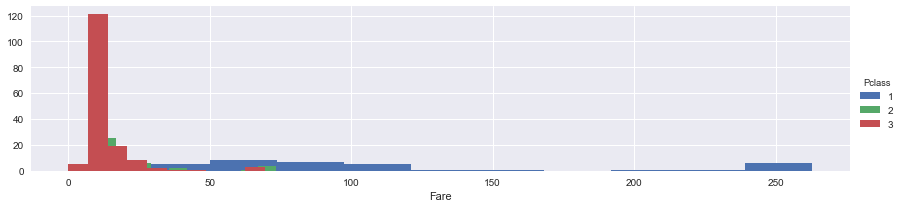

15이상 24세 이하
Pclass
1    83.1583
2    13.0000
3     7.9104
Name: Fare, dtype: float64


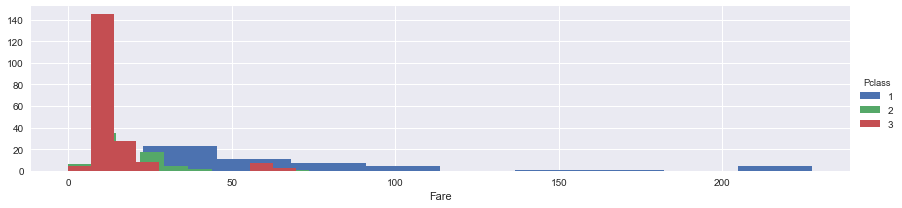

25이상 34세 이하
Pclass
1    48.5500
2    13.0000
3     7.8958
Name: Fare, dtype: float64


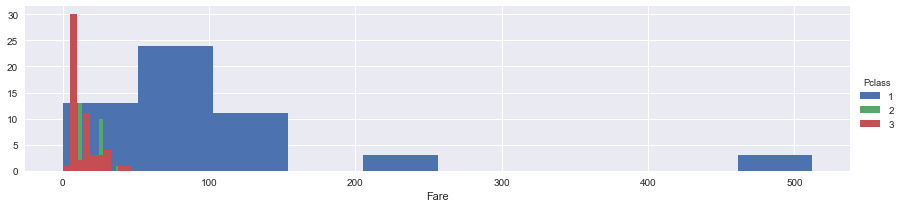

35이상 44세 이하
Pclass
1    79.0250
2    17.6250
3     8.2271
Name: Fare, dtype: float64


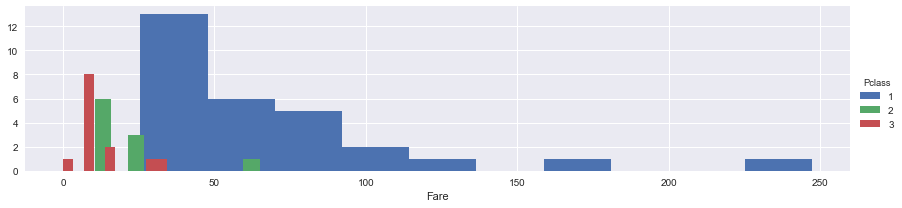

45이상 50세 이하
Pclass
1    52.00
2    14.25
3     8.05
Name: Fare, dtype: float64


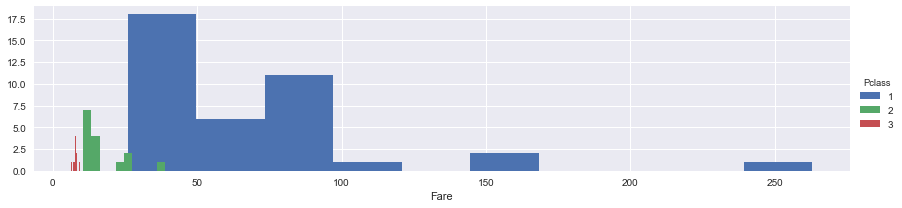

51이상
Pclass
1    51.8625
2    13.5000
3     7.7500
Name: Fare, dtype: float64


In [86]:
for i in range(6):
    target_df = train[train['Age']==i]
    facet = sns.FacetGrid(target_df, hue="Pclass",aspect=4)
    facet.map(plt.hist,'Fare')
    facet.add_legend()
    plt.show() 
    
    print(age_dict[str(i)])
    print(target_df.groupby(['Pclass'])['Fare'].median())

### 위에서 Age와 Pcalss를 고려한 결과<br>
Age : 0, (1,2,3), (4,5) 이렇게 나눌 수 있다.<br>
Age와 Pclass 조건에 따라 <br>

Age 0에서<br>
- 80 이하 : 0
- 80 이상 : 1

Age (1,2,3)에서<br>
- 40 이하 : 2
- 40 이상 : 3

Age (4,5)에서<br>
- 30 이하 : 4
- 30 이상 : 5
로 mapping 하겠다.

In [87]:
for dataset in total_data:
    dataset.loc[ (dataset['Age'] == 0) & (dataset['Fare'] < 80) , 'Fare'] = 0,
    dataset.loc[ (dataset['Age'] == 0) & (dataset['Fare'] >= 80) , 'Fare'] = 1,
    dataset.loc[ (dataset['Age'] == 1) & (dataset['Fare'] < 40) , 'Fare'] = 2,
    dataset.loc[ (dataset['Age'] == 1) & (dataset['Fare'] >= 40) , 'Fare'] = 3,
    dataset.loc[ (dataset['Age'] == 2) & (dataset['Fare'] < 40) , 'Fare'] = 2,
    dataset.loc[ (dataset['Age'] == 2) & (dataset['Fare'] >= 40) , 'Fare'] = 3,
    dataset.loc[ (dataset['Age'] == 3) & (dataset['Fare'] < 40) , 'Fare'] = 2,
    dataset.loc[ (dataset['Age'] == 3) & (dataset['Fare'] >= 40) , 'Fare'] = 3,
    dataset.loc[ (dataset['Age'] > 3) & (dataset['Fare'] < 30) , 'Fare'] = 4,
    dataset.loc[ (dataset['Age'] > 3) & (dataset['Fare'] >= 30) , 'Fare'] = 5,
    

In [88]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,2.0,0,0
1,1,1,1,3.0,1,0,3.0,1,2
2,1,3,1,2.0,0,0,2.0,0,1
3,1,1,1,3.0,1,0,3.0,0,2
4,0,3,0,3.0,0,0,2.0,0,0


In [89]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,3.0,0,0,2.0,2,0.0
1,3,1,4.0,1,0,4.0,0,2.0
2,2,0,5.0,0,0,4.0,2,0.0
3,3,0,2.0,0,0,2.0,0,0.0
4,3,1,1.0,1,1,2.0,0,2.0


In [90]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [91]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,1,0,2.0,0,0,2
1,1,1,1,3.0,1,0,3.0,1,2,2
2,1,3,1,2.0,0,0,2.0,0,1,1
3,1,1,1,3.0,1,0,3.0,0,2,2
4,0,3,0,3.0,0,0,2.0,0,0,1


In [92]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [93]:
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [94]:
family_mapping = {1: 0, 2: 1, 3: 1.5, 4: 2, 5: 2.5, 6: 3, 7: 3.5, 8: 4, 11: 5}
for dataset in total_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

### SibSp와 Parch는 겹치니 drop시키도록한다

In [95]:
feat_drop = ['SibSp', 'Parch']
train = train.drop(feat_drop, axis=1)
test = test.drop(feat_drop, axis=1)

# 3. 머신러닝 모델 학습 및 평가
- 가장 성능이 좋다고 평가 받는 SVM과, RandomForest를 사용
- 최적의 파라미터 값을 찾으면서 학습
- 최종적으로는 특징 선택 + 최적의 파라미터 값을 찾는 과정을 합쳐 최종 모델 생성

우선 train 데이터에서 label을 떼어낸다.

In [96]:
trainY = train['Survived']
trainY.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [97]:
trainX = train.drop('Survived', axis=1)
trainX.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,2.0,0,0,1.0
1,1,1,3.0,3.0,1,2,1.0
2,3,1,2.0,2.0,0,1,0.0
3,1,1,3.0,3.0,0,2,1.0
4,3,0,3.0,2.0,0,0,0.0


# SVM 파라미터 tuning사용하여 최고의 파라미터 조합을 찾자
### GridSearchCV, RandomizedSearchCV 사용해보자!

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
# refer to https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
# refer to https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/


def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10,100]
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    return grid_search

def svc_param_selection_poly(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10,100]
    degree = [3, 4]
    coef0 = [1, 2]
    param_grid = {'C': Cs, 'degree' : degree, 'coef0' : coef0}
    grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    return grid_search

def svc_param_selection_linear(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10,100]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    return grid_search

In [99]:
def svc_param_selection_random(X, y, nfolds):
    Cs = uniform(0.1, 5000)
    gammas = uniform(0.0001, 1)
    param_rand = {'C': Cs, 'gamma' : gammas}
    rand_search = RandomizedSearchCV(SVC(kernel='rbf'), param_rand, cv=nfolds, n_iter = 100)
    rand_search.fit(X, y)
    
    return rand_search

# SVM

In [100]:
# rbf
result_rbf = svc_param_selection(trainX, trainY, 4)

print('Best score for RBF:', result_rbf.best_score_) 
print('Best C:',result_rbf.best_estimator_.C) 
print('Best Kernel:',result_rbf.best_estimator_.kernel)
print('Best Gamma:',result_rbf.best_estimator_.gamma)
print('Best params:',result_rbf.best_params_) 

Best score for RBF: 0.8327721661054994
Best C: 100
Best Kernel: rbf
Best Gamma: 0.01
Best params: {'C': 100, 'gamma': 0.01}


In [101]:
# poly
result_poly = svc_param_selection_poly(trainX , trainY, 4)

print('Best score for poly:', result_poly.best_score_) 
print('Best C:',result_poly.best_estimator_.C) 
print('Best Kernel:',result_poly.best_estimator_.kernel)
print('Best degree:',result_poly.best_estimator_.degree)
print('Best params:',result_poly.best_params_) 

Best score for poly: 0.8294051627384961
Best C: 0.01
Best Kernel: poly
Best degree: 4
Best params: {'degree': 4, 'C': 0.01, 'coef0': 2}


In [102]:
# linear
result_linear = svc_param_selection_linear(trainX , trainY, 4)

print('Best score for poly:', result_linear.best_score_) 
print('Best C:',result_linear.best_estimator_.C) 
print('Best Kernel:',result_linear.best_estimator_.kernel)
print('Best params:',result_linear.best_params_) 

Best score for poly: 0.7912457912457912
Best C: 0.1
Best Kernel: linear
Best params: {'C': 0.1}


In [103]:
# rbf_randomizedSearchCV
result_rand = svc_param_selection_random(trainX, trainY, 4)

print('Best score for rand_rbf:', result_rand.best_score_) 
print('Best C:',result_rand.best_estimator_.C) 
print('Best Kernel:',result_rand.best_estimator_.kernel)
print('Best degree:',result_rand.best_estimator_.degree)
print('Best params:',result_rand.best_params_) 

Best score for rand_rbf: 0.819304152637486
Best C: 757.2203422211632
Best Kernel: rbf
Best degree: 3
Best params: {'C': 757.2203422211632, 'gamma': 0.018488482982150677}


## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
def RF_param_selection(X, y, nfolds):
    ne = [5, 10, 100, 200]
    mf = ['auto']
    md = [4,6,8]
    cr = ['gini', 'entropy']
    param_grid = {'n_estimators': ne, 'max_features' : mf, 'max_depth' : md, 'criterion' : cr}
    
    rf = RandomForestClassifier(random_state=50)
    grid_search = GridSearchCV(rf, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    
    return grid_search

In [105]:
result_rf = RF_param_selection(trainX , trainY, 4)

print('Best score for rf:', result_rf.best_score_) 
print('Best params:',result_rf.best_params_) 

Best score for rf: 0.8316498316498316
Best params: {'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini', 'n_estimators': 200}


# Feature Selection

In [106]:
key_list = list(trainX.keys())

In [107]:
key_list

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize']

In [108]:
key_combinations = []
import itertools
for i in range(1, len(key_list)+1):
    for subset in itertools.combinations(key_list, i): # 이것을 쓰게되면 nC1같은 효과 뽑아주기 모든 경우의수
        # all_variable_list에서 L개를 뽑는 것
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        key_combinations.append(temp)

In [109]:
len(key_combinations)

127

총 특징 127가지의 조합의 최고 값을 찾아보자!

# Feature Selection + Parameter Optimization

In [110]:
import time

In [111]:
def model_training(func, train_data, train_label, comb_list):
    start_time = time.time() 
    result_comb = []
    print('Now model training')
    for i, feat_comb in enumerate(comb_list):
        result = func(train_data[comb_list[i]], train_label, 2)
        result_comb.append([i,feat_comb, result.best_params_, result.best_score_])
    print("--- %s seconds ---" %(time.time() - start_time))
    
    return result_comb

In [112]:
def find_max(results):
    results = np.array(results)
    max_index = np.where(results[:,-1]==results[:,-1].max())
    return results[max_index]

### 위에서 가장 성능이 좋았던 SVM_RBF와 RandomForest사용

In [113]:
result_total_rbf = model_training(svc_param_selection, trainX, trainY, key_combinations)

Now model training
--- 107.49566841125488 seconds ---


In [114]:
find_max(result_total_rbf)

array([[81, list(['Pclass', 'Fare', 'Title', 'FamilySize']),
        {'C': 100, 'gamma': 0.01}, 0.8316498316498316],
       [103, list(['Pclass', 'Sex', 'Age', 'Title', 'FamilySize']),
        {'C': 100, 'gamma': 0.01}, 0.8316498316498316],
       [106, list(['Pclass', 'Sex', 'Fare', 'Title', 'FamilySize']),
        {'C': 100, 'gamma': 0.01}, 0.8316498316498316]], dtype=object)

In [115]:
result_total_rf = model_training(RF_param_selection, trainX, trainY, key_combinations)

Now model training
--- 622.5077056884766 seconds ---


In [116]:
find_max(result_total_rf)

array([[106, list(['Pclass', 'Sex', 'Fare', 'Title', 'FamilySize']),
        {'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini', 'n_estimators': 10},
        0.8316498316498316]], dtype=object)

# 최종 Test 제출

### 가장 좋은 모델결과 및 파라미터에 따라 모델 생성

## 위의 결과로 정확도가 83.16%로 가장 높은 SVM-RBF 분류모델을 사용하며, 해당 파라미터와 특징을 사용한다.

In [137]:
# model codes
classifier = SVC(kernel='rbf', C=100, gamma = 0.01)
classifier.fit(trainX[key_combinations[106]], trainY)
print(classifier.score(trainX[key_combinations[106]], trainY))

prediction = classifier.predict(test[key_combinations[106]])

0.8361391694725028


In [138]:
test[key_combinations[106]].head()

,Pclass,Sex,Fare,Title,FamilySize
0,3,0,2.0,0.0,0.0
1,3,1,4.0,2.0,1.0
2,2,0,4.0,0.0,0.0
3,3,0,2.0,0.0,0.0
4,3,1,2.0,2.0,1.5


In [139]:
train[key_combinations[106]].head()

,Pclass,Sex,Fare,Title,FamilySize
0,3,0,2.0,0,1.0
1,1,1,3.0,2,1.0
2,3,1,2.0,1,0.0
3,1,1,3.0,2,1.0
4,3,0,2.0,0,0.0


In [140]:
Titanic_result = pd.DataFrame({
        "PassengerId": test_copy["PassengerId"],
        "Survived": prediction
    })

Titanic_result.to_csv('Titanic_result.csv', index=False)

Titanic_result = pd.read_csv('Titanic_result.csv')
Titanic_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## References
This notebook refers to the following :
- https://github.com/minsuk-heo
- Titanic Data Science Solutions - Manav Sehgal